# Simple Linear Regression model


###### Following are the steps covered in building a Simple Linear Regression model considering only one Predictor/ Independent variable on a Target variable.
 1. Reading and Understanding the data
 2. Building a Linear Regression Model
 3. Residual Analysis
 4. Prediction on Test data
 5. Inference
 6. Another approach to build a Simple Linear Regression 
 

## 1. Reading and Understanding the data

In [1]:
#Supress warning

import warnings
warnings.filterwarnings('ignore')

In [72]:
# import necessary libraries and modules

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Read the data

adv = pd.read_csv('advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Perform basic routine commands

adv.shape

(200, 4)

In [5]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### There are three Predictor variables- TV, Radio and Newspaper. Sales is the Target variable. To find the relation between each of the Predictor variables and Target variable, we can either use the Pair plot

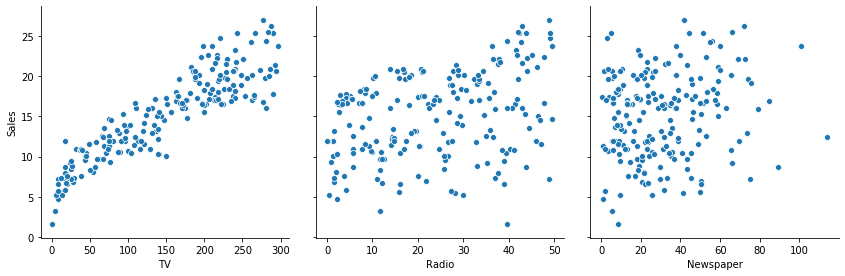

In [14]:
sns.pairplot(x_vars =['TV', 'Radio', 'Newspaper'], y_vars = 'Sales',data = adv,size = 4)
plt.show()

#### TV seems to be highly related to Sales. For simplicity of this model, we shall be considering only one Independent variable- 'TV' for our evaluation.

## 2. Building a Linear Regression Model

A. Using statsmodel to build the model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Assigning the variables..

X = adv.TV
y = adv.Sales

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.70, random_state = 100)

In [20]:
# Routine check commands on train dataset..

X_train.shape
# y_train

(140,)

#### By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train , you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels

In [22]:
import statsmodels.api as sm

In [24]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


#### Now that you've all the variables needed, fit a regression line using the OLS method


In [28]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.52e-52
Time:                        17:25:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [32]:
type(lr)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [35]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.52e-52
Time:                        17:33:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### Looking at the key statistics
The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

###### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

###### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

###### From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

###### Visualizing the equation- 

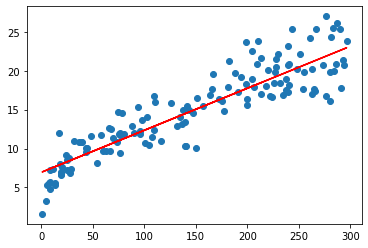

In [38]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 0.054 * X_train + 6.948,"r")
plt.show()

## Step 3: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [40]:
y_pred = lr.predict(X_train_sm)

In [41]:
res = (y_train - y_pred)

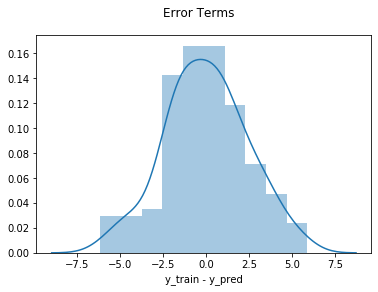

In [48]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms') 
plt.xlabel('y_train - y_pred')         
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

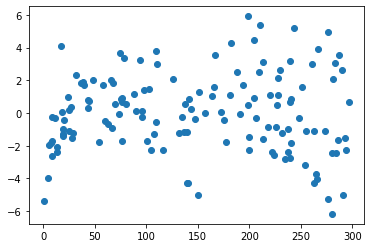

In [54]:
plt.scatter(X_train,res)
plt.show()

## Step 4: Predictions on Test Set


######  We shall follow the same steps as done in the previous(train_test)

In [55]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [56]:
lm = sm.OLS(y_test, X_test_sm).fit()

In [57]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     252.2
Date:                Mon, 25 May 2020   Prob (F-statistic):           8.76e-23
Time:                        17:53:20   Log-Likelihood:                -124.12
No. Observations:                  60   AIC:                             252.2
Df Residuals:                      58   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7268      0.602     11.166      0.0

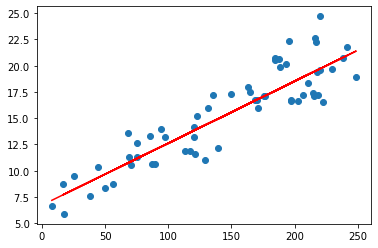

In [59]:
plt.scatter(X_test,y_test)
plt.plot(X_test, 0.059 * X_test + 6.72, "r")
plt.show()

## Looking at the statistics, plots and values we can infer  that the model predicts the equation correctly.

## Another approach to build the model

#### There's also another method of building a Simple Linear Regression model using sklearn. This is quite straightforward except for one catch, one additional step needs to be added as seen against statsmodel

In [78]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
X_train_lm.shape

(140,)

####  One small step need to be included i.e. we need to add an additional column in order for the linear regression fit to be performed successfully.

In [81]:
X_train_lm = X_train_lm.reshape(-1,1)
X_test_lm = X_test_lm.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

##### The equation is same as earlier: $ Sales = 6.948 + 0.054* TV $ 

####  Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)